# Probabilistic Graphs and Influence Maximization Lab

In [1]:
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import time

rnd.seed()

## Graph Input

In [2]:
G = nx.read_edgelist("karate")

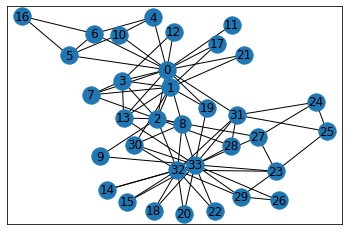

In [3]:
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G,pos, with_labels=True)
plt.show()

## Generating a Possible World

We set the probability of each edge:

In [4]:
p = 0.5

We define a method which takes a probabilistic graph, along with p and generates a possible world via sampling:

In [5]:
def gen_possible_world(G,p):
    F = nx.Graph()
    F.add_nodes_from(G) #every node in G belong to the possible world
    for e in G.edges():
        #for every edge in G, we sample the edge with probability p
        dice = rnd.random()
        if dice<=p: #we add th edge if the dice is successful
            F.add_edge(e[0],e[1])
    return F

In [6]:
G_p = gen_possible_world(G,p)

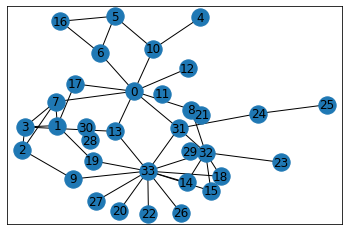

In [7]:

pos = nx.kamada_kawai_layout(G_p)
nx.draw_networkx(G_p,pos, with_labels=True)
plt.show()

## Computing Reachability

We define a function which computes the reachability via sampling:

In [8]:
def reachability(G,s,t,p=0.1,rounds=1000):
    # G - the probabilistic graph
    # s - the source node
    # t - the target node
    # p - the value of the probability on each node
    # round - the number of sampling rounds
    good = 0
    for _ in range(rounds):
        G_p = gen_possible_world(G,p)
        if nx.has_path(G_p,s,t):
            good += 1
    return float(good)/float(rounds)


def influence(G,s,p=0.1,rounds=1000):
    # G - the probabilistic graph
    # s - the source node
    # p - the value of the probability on each node
    # round - the number of sampling rounds
    good = 0
    for _ in range(rounds):
        G_p = gen_possible_world(G,p)
        for target in nx.node_connected_component(G_p,s):
            #if nx.has_path(G_p,s,target): # optimal implementation
            good += 1
        
    return float(good)/float(rounds)

#class to store the top five nodes with highest influence
class top_five:
    def __init__(self):
        self.top_val = {}
    
    def check_and_add_element(self,value,id):
        if(len(self.top_val)<5):
            self.top_val[id] = value
        else:
            if(value > min(self.top_val.values())):
                min_v = min(self.top_val.values())
                for keys in self.top_val.keys():
                    if min_v == self.top_val[keys]:
                        self.top_val.pop(keys, None)
                        break
                self.top_val[id] = value    
    
    def get_top_ids(self):
        return self.top_val
    
    def get_dict_top_value(self):
        pass

In [9]:
reachability(G,'16','27',0.5)

0.544

In [10]:
influence(G,'5')



1.842

 5 nodes with most influence for p=0.010000 are
{'0': 1.167, '3': 1.076, '2': 1.121, '32': 1.111, '33': 1.173}


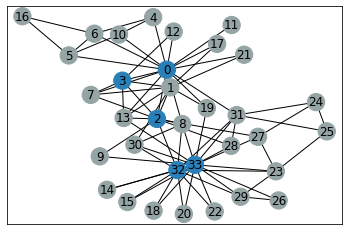

 5 nodes with most influence for p=0.100000 are
{'0': 3.395, '2': 2.933, '1': 2.59, '32': 2.894, '33': 3.578}


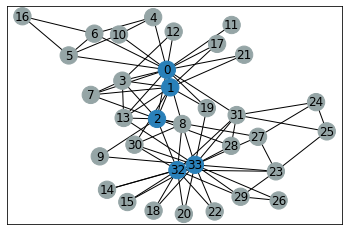

 5 nodes with most influence for p=0.500000 are
{'0': 28.275, '2': 28.216, '1': 28.002, '32': 28.339, '33': 28.381}


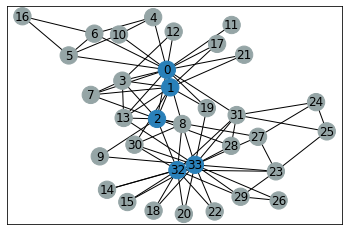

In [11]:
available_colors = ["#2980b9","#95a5a6"]
                    
for prob in [0.01,0.1,0.5]:
    buf = top_five()
    for g in G.nodes():
        #print(g)
        #print(influence(G,g))
        buf.check_and_add_element(influence(G,g,prob),g)
    
    print(" 5 nodes with most influence for p=%f are"%prob)
    print(buf.get_top_ids())
    color = []
    for node in G.nodes():
        if node in buf.top_val.keys():
            color.append(available_colors[0])
        else:
            color.append(available_colors[1])

    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx(G,pos,node_color=color, with_labels=True)
    plt.show()


The top 5 nodes with max influence are the same regardless of the probability

### BFS influence
The implementation of reachability and the influence with BFS

#### reachability

In [12]:
def reachability_bfs(G,s,t,p=0.1,rounds=1000):
    # G - the probabilistic graph
    # s - the source node
    # t - the target node
    # p - the value of the probability on each node
    # round - the number of sampling rounds
    good = 0
    for _ in range(rounds):
        if reachability_bfs_iteration(G,s,t,p):
            good+=1
    return float(good)/float(rounds)
    
    
def reachability_bfs_iteration(G,s,t,p=0.1):
    ls = [s] # start by the initiale node
    visited = set() # set of visited nodes
    
    while len(ls)>0: # ls non empty
        el = ls.pop(0)
        visited.add(el)
        for neigbor in nx.neighbors(G,el):
            if neigbor not in visited:
                dice = rnd.random()
                if dice<=p:
                    ls.append(neigbor)
    return t in visited
    



In [13]:
%%time
reachability(G,'16','27',0.5)

Wall time: 216 ms


0.532

In [14]:
%%time
reachability_bfs(G,'16','27',0.5)

Wall time: 60 ms


0.594

#### Influence and spread with BFS comparaison

In [15]:
#BFS influence implementations

def influence_bfs(G,s,p=0.1,rounds=1000):
    # G - the probabilistic graph
    # s - the source node
    # p - the value of the probability on each node
    # round - the number of sampling rounds
    good = 0
    for _ in range(rounds):
        good += influence_bfs_iteration(G,s,p)
    return float(good)/float(rounds)


def influence_bfs_iteration(G,s,p=0.1):
    # G - the probabilistic graph
    # s - the source node
    # p - the value of the probability on each node
    ls = [s] # start by the initiale node
    visited = set() # set of visited nodes
    
    while len(ls)>0: # ls non empty
        el = ls.pop(0)
        visited.add(el)
        for neigbor in nx.neighbors(G,el):
            if neigbor not in visited:
                dice = rnd.random()
                if dice<=p:
                    ls.append(neigbor)
    return len(visited)
            
    

In [16]:
%%time

# Test with regular method

buf = top_five()

for g in G.nodes():
    buf.check_and_add_element(influence(G,g),g)
    
print(" 5 nodes with most influence for p=%f are"%0.1)
print(buf.get_top_ids())




 5 nodes with most influence for p=0.100000 are
{'0': 3.329, '2': 2.816, '1': 2.55, '32': 2.93, '33': 3.543}
Wall time: 3.76 s


In [17]:
%%time

# Test with BFS

buf = top_five()

for g in G.nodes():
    buf.check_and_add_element(influence_bfs(G,g),g)
    
print(" 5 nodes with most influence for p=%f are"%prob)
print(buf.get_top_ids())




 5 nodes with most influence for p=0.500000 are
{'0': 3.394, '2': 2.981, '1': 2.723, '32': 3.056, '33': 3.513}
Wall time: 128 ms


## 3- Influence Maximization

In [18]:
def spread(G,seeds,p=0.1,rounds=1000):
    # G - the probabilistic graph
    # seeds - list of seeds
    # p - the value of the probability on each node
    # round - the number of sampling rounds
    good = 0
    for _ in range(rounds):
        good += spread_bfs_iteration(G,seeds,p)
    return float(good)/float(rounds)


def spread_bfs_iteration(G,seeds,p=0.1):
    # G - the probabilistic graph
    # s - the source node
    # p - the value of the probability on each node
    ls = seeds.copy() # start by the initiale nodes
    visited = set() # set of visited nodes
    
    while len(ls)>0: # ls non empty
        el = ls.pop(0)
        visited.add(el)
        for neigbor in nx.neighbors(G,el):
            if neigbor not in visited:
                dice = rnd.random()
                if dice<=p:
                    ls.append(neigbor)
    return len(visited)

In [19]:
def greadymi(G,k,p=0.01):
    seeds = []
    for i in range(0,k):
        max_val = -1
        max_seeds = None
        
        for node in G.nodes():
            if node not in seeds:
                tmp_seeds = seeds.copy()
                tmp_seeds.append(node)
                spead_val = spread(G,tmp_seeds,p)
                if spead_val > max_val:
                    max_val = spead_val
                    max_seeds = tmp_seeds
                    
        seeds = max_seeds
        print(seeds) 
        print(max_val)
    return seeds
            
    

['33']
1.981
['33', '0']
3.921
['33', '0', '32']
5.426
['33', '0', '32', '1']
6.722
['33', '0', '32', '1', '2']
7.949


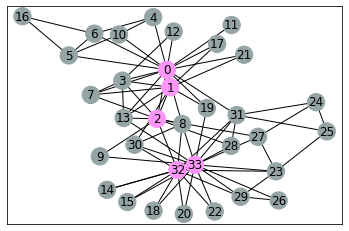

Wall time: 2.2 s


In [20]:
%%time
probability = 0.05

available_colors = ["#ff96fc","#95a5a6"]

influ_seeds = greadymi(G,5,probability)

color = []
for node in G.nodes():
    if node in influ_seeds:
        color.append(available_colors[0])
    else:
        color.append(available_colors[1])

pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G,pos,node_color=color, with_labels=True)
plt.show()

### Comparaison between Gready and random seeds

we will generate random seeds then compute their spread, we will build a graph that shows the distribution of the spread to have an idea in what yop % does the greadyIM spread ranks

In [21]:
number_of_seeds = 5

def gen_random_seeds(G,number_of_seeds,probability):
    random_seeds = []

    while len(random_seeds) < 5:
        for g in G.nodes():
            if g not in random_seeds:
                dice = rnd.random()
                if dice<=0.05: # randomly decide if to include it or not
                    random_seeds.append(g)
    print(random_seeds)
    val = spread(G,random_seeds,probability)
    print("The spread for this random seeds is %f "%val)
    return val


gen_random_seeds(G,number_of_seeds,probability)
            
    

['0', '21', '1', '2', '32', '28']
The spread for this random seeds is 8.240000 


8.24

['16', '0', '5', '21', '18', '24', '26']
The spread for this random seeds is 8.538000 
['7', '4', '3', '21', '11', '30']
The spread for this random seeds is 7.251000 
['8', '6', '14', '5', '1', '29', '24']
The spread for this random seeds is 8.819000 
['7', '6', '25', '2', '17', '16']
The spread for this random seeds is 7.392000 
['5', '9', '18', '32', '20']
The spread for this random seeds is 6.153000 
['1', '15', '9', '18', '8', '32', '29']
The spread for this random seeds is 8.747000 
['30', '9', '23', '25', '3']
The spread for this random seeds is 6.261000 
['33', '7', '6', '15', '25']
The spread for this random seeds is 6.753000 
['12', '1', '15', '6', '33', '23']
The spread for this random seeds is 8.136000 
['3', '20', '26', '12', '30', '33', '29']
The spread for this random seeds is 8.653000 
['10', '5', '30', '21', '24', '26']
The spread for this random seeds is 7.168000 
['32', '24', '12', '8', '16']
The spread for this random seeds is 6.483000 
['10', '16', '26', '6', '32']


The spread for this random seeds is 8.843000 
['2', '32', '28', '9', '18']
The spread for this random seeds is 6.368000 
['11', '16', '31', '25', '17', '3']
The spread for this random seeds is 7.166000 
['24', '19', '4', '20', '0', '1']
The spread for this random seeds is 7.816000 
['17', '12', '1', '19', '2', '15']
The spread for this random seeds is 7.533000 
['7', '19', '33', '31', '25']
The spread for this random seeds is 6.769000 
['2', '33', '23', '0', '10', '7', '5']
The spread for this random seeds is 9.511000 
['19', '17', '16', '10', '20']
The spread for this random seeds is 5.879000 
['11', '3', '2', '22', '23']
The spread for this random seeds is 6.512000 
['11', '7', '29', '9', '14', '22']
The spread for this random seeds is 7.239000 
['24', '16', '6', '30', '21', '7', '15']
The spread for this random seeds is 8.251000 
['10', '27', '9', '14', '23']
The spread for this random seeds is 5.989000 
['11', '5', '18', '31', '26']
The spread for this random seeds is 6.089000 
['2

The spread for this random seeds is 6.756000 
['17', '8', '1', '9', '21', '11', '27']
The spread for this random seeds is 8.516000 
['8', '7', '24', '18', '13', '32', '28']
The spread for this random seeds is 8.945000 
['5', '32', '27', '23', '4', '3', '2']
The spread for this random seeds is 9.153000 
['11', '28', '19', '31', '22', '29']
The spread for this random seeds is 7.271000 
['31', '28', '18', '5', '22']
The spread for this random seeds is 6.089000 
['27', '9', '26', '15', '19']
The spread for this random seeds is 6.031000 
['2', '21', '18', '0', '14']
The spread for this random seeds is 6.748000 
['1', '23', '12', '3', '6']
The spread for this random seeds is 6.454000 
['4', '0', '21', '10', '30']
The spread for this random seeds is 6.270000 
['4', '13', '10', '29', '24']
The spread for this random seeds is 6.107000 
['17', '23', '19', '4', '25']
The spread for this random seeds is 5.953000 
['9', '22', '5', '4', '24']
The spread for this random seeds is 5.964000 
['31', '17'

The spread for this random seeds is 8.414000 
['27', '3', '0', '8', '9', '14', '22']
The spread for this random seeds is 9.139000 
['29', '9', '15', '5', '32']
The spread for this random seeds is 6.375000 
['12', '11', '1', '28', '18']
The spread for this random seeds is 6.220000 
['19', '27', '25', '22', '3', '1', '18']
The spread for this random seeds is 8.753000 
['5', '31', '26', '28', '3', '23']
The spread for this random seeds is 7.621000 
['8', '29', '10', '11', '17', '3', '27']
The spread for this random seeds is 8.727000 
['5', '31', '13', '3', '9', '20', '29']
The spread for this random seeds is 8.839000 
['21', '0', '1', '23', '24']
The spread for this random seeds is 6.789000 
['11', '5', '2', '33', '10', '3']
The spread for this random seeds is 8.138000 
['25', '17', '8', '31', '32', '27']
The spread for this random seeds is 7.733000 
['17', '24', '0', '11', '32']
The spread for this random seeds is 6.845000 
['3', '1', '25', '31', '17', '16', '23', '29']
The spread for th

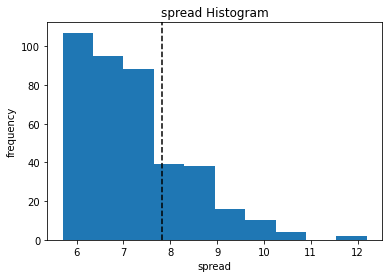

is top percent of randoms 24.812030


In [22]:

def top_percentage(value,list_values):
    ls2 = [x for x in list_values if x>value ]
    return len(ls2)/len(list_values)

deg_seq = []
for i in range(1,400):
    deg_seq.append(round(gen_random_seeds(G,number_of_seeds,probability),1))


plt.hist(deg_seq)
plt.title('spread Histogram')
plt.xlabel('spread')
plt.ylabel('frequency')
plt.axvline(x=spread(G,influ_seeds,probability),color='k', linestyle='--')
plt.show()

print("is top percent of randoms %f"%(100*top_percentage(spread(G,influ_seeds,probability),deg_seq)))

This shows that the gready approche never breaks into the top 15% of best solutions [21%-27%], still it is an okey result considering the execution tme

##### ranking of the gready spread from random spreads in function of the probablity

In [23]:
#probabilities = [ (x+1)/50 for x in range(0,40)]
probabilities = [ 0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.7]

performance = []

for prob in probabilities:
    val_seeds = greadymi(G,5,probability)
    
    deg_seq = []
    for i in range(1,400):
        deg_seq.append(round(gen_random_seeds(G,number_of_seeds,probability),1))
    performance.append(100*top_percentage(spread(G,influ_seeds,probability),deg_seq))

    

['0']
1.968
['0', '33']
3.931
['0', '33', '32']
5.409
['0', '33', '32', '2']
6.633
['0', '33', '32', '2', '6']
7.905
['27', '14', '4', '26', '11']
The spread for this random seeds is 5.946000 
['26', '32', '33', '22', '24']
The spread for this random seeds is 6.657000 
['10', '16', '2', '5', '21', '32', '29']
The spread for this random seeds is 8.781000 
['6', '3', '15', '28', '14']
The spread for this random seeds is 6.301000 
['8', '7', '14', '3', '23']
The spread for this random seeds is 6.475000 
['31', '10', '3', '4', '32', '14']
The spread for this random seeds is 7.792000 
['15', '7', '19', '28', '26']
The spread for this random seeds is 6.089000 
['8', '0', '9', '11', '30']
The spread for this random seeds is 6.516000 
['13', '3', '32', '25', '15']
The spread for this random seeds is 6.559000 
['11', '28', '23', '10', '27']
The spread for this random seeds is 6.070000 
['13', '5', '32', '10', '19', '12', '8', '23']
The spread for this random seeds is 10.010000 
['24', '30', '18

The spread for this random seeds is 8.556000 
['12', '7', '9', '33', '20']
The spread for this random seeds is 6.488000 
['26', '0', '31', '23', '15']
The spread for this random seeds is 6.849000 
['17', '4', '25', '13', '23']
The spread for this random seeds is 6.182000 
['14', '23', '28', '27', '0', '21', '6', '16']
The spread for this random seeds is 9.939000 
['31', '13', '10', '12', '30', '14']
The spread for this random seeds is 7.571000 
['31', '19', '30', '23', '8', '33', '18', '29']
The spread for this random seeds is 9.808000 
['1', '5', '31', '11', '3', '32']
The spread for this random seeds is 8.029000 
['20', '6', '19', '32', '27']
The spread for this random seeds is 6.518000 
['5', '18', '14', '20', '17']
The spread for this random seeds is 5.917000 
['5', '16', '33', '29', '11']
The spread for this random seeds is 6.520000 
['7', '2', '29', '26', '19', '5', '28']
The spread for this random seeds is 8.740000 
['11', '30', '32', '9', '7', '16', '14']
The spread for this ra

The spread for this random seeds is 8.697000 
['10', '33', '11', '3', '32', '24', '26']
The spread for this random seeds is 9.338000 
['17', '8', '28', '33', '31', '27']
The spread for this random seeds is 7.782000 
['26', '21', '30', '0', '8', '15']
The spread for this random seeds is 7.690000 
['8', '3', '9', '33', '15', '29']
The spread for this random seeds is 7.812000 
['20', '31', '19', '4', '28']
The spread for this random seeds is 6.125000 
['8', '16', '33', '31', '6']
The spread for this random seeds is 6.822000 
['7', '29', '24', '14', '10']
The spread for this random seeds is 6.108000 
['15', '29', '24', '4', '8']
The spread for this random seeds is 6.241000 
['0', '18', '29', '21', '5', '22', '23', '24']
The spread for this random seeds is 10.047000 
['0', '13', '3', '1', '20', '23']
The spread for this random seeds is 7.938000 
['4', '16', '6', '12', '5']
The spread for this random seeds is 5.547000 
['31', '8', '27', '1', '24']
The spread for this random seeds is 6.585000

The spread for this random seeds is 5.983000 
['17', '25', '28', '8', '6', '1', '26']
The spread for this random seeds is 8.848000 
['1', '33', '14', '24', '8', '16', '18']
The spread for this random seeds is 9.026000 
['28', '26', '31', '13', '24']
The spread for this random seeds is 6.138000 
['12', '20', '1', '22', '4']
The spread for this random seeds is 6.237000 
['11', '30', '27', '4', '24']
The spread for this random seeds is 5.934000 
['17', '2', '28', '21', '8', '6', '3']
The spread for this random seeds is 8.686000 
['7', '22', '25', '3', '33']
The spread for this random seeds is 6.798000 
['0', '31', '27', '26', '19', '14']
The spread for this random seeds is 7.770000 
['22', '6', '4', '10', '13', '27']
The spread for this random seeds is 7.172000 
['20', '23', '28', '8', '21', '17', '30', '26']
The spread for this random seeds is 9.598000 
['8', '6', '28', '23', '5', '1', '15']
The spread for this random seeds is 8.998000 
['3', '18', '13', '33', '22']
The spread for this r

The spread for this random seeds is 8.708000 
['1', '18', '32', '28', '24']
The spread for this random seeds is 6.709000 
['17', '10', '5', '33', '23']
The spread for this random seeds is 6.581000 
['14', '0', '12', '11', '26']
The spread for this random seeds is 6.235000 
['0', '32', '28', '20', '1']
The spread for this random seeds is 7.183000 
['29', '27', '6', '33', '32']
The spread for this random seeds is 6.897000 
['13', '2', '29', '21', '1']
The spread for this random seeds is 6.477000 
['31', '16', '18', '25', '20']
The spread for this random seeds is 5.871000 
['24', '19', '20', '31', '5', '14']
The spread for this random seeds is 7.275000 
['16', '31', '2', '18', '29']
The spread for this random seeds is 6.581000 
['4', '22', '29', '17', '7']
The spread for this random seeds is 6.135000 
['17', '22', '27', '30', '33']
The spread for this random seeds is 6.652000 
['31', '6', '25', '11', '5', '2', '33']
The spread for this random seeds is 9.395000 
['11', '6', '2', '14', '13'

The spread for this random seeds is 6.081000 
['21', '6', '16', '15', '19']
The spread for this random seeds is 5.847000 
['15', '22', '31', '14', '18']
The spread for this random seeds is 5.987000 
['7', '32', '33', '15', '29']
The spread for this random seeds is 6.617000 
['5', '28', '19', '11', '7', '16']
The spread for this random seeds is 7.098000 
['15', '23', '5', '32', '14']
The spread for this random seeds is 6.318000 
['2', '27', '16', '14', '10', '24']
The spread for this random seeds is 7.430000 
['11', '8', '30', '10', '32', '9']
The spread for this random seeds is 7.564000 
['6', '4', '0', '5', '28', '9']
The spread for this random seeds is 7.426000 
['30', '18', '13', '7', '11', '2', '20']
The spread for this random seeds is 8.630000 
['29', '25', '10', '7', '32', '33']
The spread for this random seeds is 8.128000 
['13', '32', '31', '19', '12', '7', '24']
The spread for this random seeds is 8.922000 
['21', '17', '6', '9', '14']
The spread for this random seeds is 5.983

The spread for this random seeds is 6.570000 
['19', '21', '4', '3', '1', '25']
The spread for this random seeds is 7.352000 
['17', '0', '8', '7', '4', '28']
The spread for this random seeds is 7.562000 
['10', '33', '19', '4', '2', '28']
The spread for this random seeds is 7.836000 
['4', '19', '30', '20', '7']
The spread for this random seeds is 6.122000 
['13', '28', '33', '18', '22']
The spread for this random seeds is 6.373000 
['7', '11', '4', '3', '17', '28', '27']
The spread for this random seeds is 8.459000 
['13', '4', '9', '16', '14']
The spread for this random seeds is 6.042000 
['1', '27', '13', '7', '26']
The spread for this random seeds is 6.359000 
['19', '8', '1', '15', '0', '31', '29']
The spread for this random seeds is 9.227000 
['19', '5', '14', '4', '20']
The spread for this random seeds is 6.083000 
['17', '7', '4', '2', '15']
The spread for this random seeds is 6.444000 
['20', '29', '21', '10', '15']
The spread for this random seeds is 5.995000 
['7', '11', '1

The spread for this random seeds is 7.349000 
['23', '26', '25', '30', '15']
The spread for this random seeds is 5.947000 
['3', '2', '28', '19', '1', '22']
The spread for this random seeds is 7.576000 
['30', '28', '2', '23', '26']
The spread for this random seeds is 6.433000 
['10', '1', '30', '29', '7', '27', '23']
The spread for this random seeds is 8.789000 
['16', '21', '13', '30', '14', '22']
The spread for this random seeds is 7.309000 
['8', '3', '23', '24', '26']
The spread for this random seeds is 6.537000 
['19', '18', '20', '29', '23']
The spread for this random seeds is 5.976000 
['21', '31', '17', '7', '2', '22']
The spread for this random seeds is 7.557000 
['4', '16', '14', '19', '22']
The spread for this random seeds is 5.898000 
['2', '25', '19', '11', '6', '24']
The spread for this random seeds is 7.551000 
['9', '23', '0', '2', '28']
The spread for this random seeds is 6.872000 
['31', '30', '0', '13', '9']
The spread for this random seeds is 6.886000 
['12', '3', 

The spread for this random seeds is 6.233000 
['8', '12', '4', '3', '27', '22']
The spread for this random seeds is 7.502000 
['30', '29', '25', '6', '1', '14']
The spread for this random seeds is 7.578000 
['11', '12', '10', '26', '29']
The spread for this random seeds is 5.759000 
['8', '16', '6', '32', '27', '22']
The spread for this random seeds is 7.534000 
['8', '3', '7', '24', '13']
The spread for this random seeds is 6.404000 
['19', '17', '4', '30', '18']
The spread for this random seeds is 6.039000 
['13', '8', '29', '1', '27']
The spread for this random seeds is 6.728000 
['21', '27', '18', '26', '28']
The spread for this random seeds is 5.979000 
['7', '22', '30', '12', '10', '4']
The spread for this random seeds is 7.206000 
['31', '7', '19', '5', '2']
The spread for this random seeds is 6.663000 
['31', '21', '11', '20', '29']
The spread for this random seeds is 6.055000 
['18', '25', '26', '11', '20']
The spread for this random seeds is 5.729000 
['11', '19', '5', '3', '

The spread for this random seeds is 7.014000 
['21', '3', '22', '18', '13', '8', '2', '28']
The spread for this random seeds is 9.811000 
['32', '33', '29', '15', '22']
The spread for this random seeds is 6.345000 
['2', '20', '30', '14', '25']
The spread for this random seeds is 6.463000 
['15', '20', '10', '2', '24']
The spread for this random seeds is 6.441000 
['33', '27', '5', '1', '18']
The spread for this random seeds is 6.881000 
['17', '30', '20', '25', '12', '3', '9', '22']
The spread for this random seeds is 9.558000 
['18', '23', '32', '16', '2']
The spread for this random seeds is 6.714000 
['17', '29', '7', '20', '4', '32', '16']
The spread for this random seeds is 8.689000 
['3', '5', '16', '33', '15']
The spread for this random seeds is 6.647000 
['14', '31', '17', '7', '5', '18', '23']
The spread for this random seeds is 8.696000 
['21', '9', '22', '24', '13']
The spread for this random seeds is 6.058000 
['21', '13', '12', '11', '3']
The spread for this random seeds i

The spread for this random seeds is 8.184000 
['21', '1', '9', '12', '27', '24']
The spread for this random seeds is 7.271000 
['0', '17', '8', '30', '16']
The spread for this random seeds is 6.501000 
['21', '5', '23', '11', '6', '14']
The spread for this random seeds is 7.174000 
['4', '2', '13', '22', '7', '33', '14']
The spread for this random seeds is 9.019000 
['11', '18', '6', '20', '25']
The spread for this random seeds is 5.942000 
['23', '10', '7', '22', '14', '15']
The spread for this random seeds is 7.265000 
['17', '10', '30', '15', '6', '4']
The spread for this random seeds is 6.992000 
['5', '32', '16', '1', '25']
The spread for this random seeds is 6.736000 
['20', '17', '18', '22', '7', '2', '29']
The spread for this random seeds is 8.551000 
['4', '7', '14', '17', '13', '20']
The spread for this random seeds is 7.257000 
['11', '5', '25', '17', '2']
The spread for this random seeds is 6.306000 
['30', '31', '10', '8', '17', '5']
The spread for this random seeds is 7.3

The spread for this random seeds is 10.198000 
['19', '30', '10', '8', '1']
The spread for this random seeds is 6.402000 
['8', '30', '17', '9', '27', '22']
The spread for this random seeds is 7.199000 
['21', '11', '20', '14', '7']
The spread for this random seeds is 5.911000 
['27', '15', '31', '21', '7', '6', '2', '1', '16']
The spread for this random seeds is 11.019000 
['0', '2', '16', '24', '26']
The spread for this random seeds is 6.890000 
['22', '16', '24', '17', '26']
The spread for this random seeds is 5.809000 
['8', '9', '30', '20', '11']
The spread for this random seeds is 5.923000 
['17', '30', '13', '20', '31', '18']
The spread for this random seeds is 7.493000 
['3', '1', '23', '8', '0', '31', '19', '15']
The spread for this random seeds is 10.298000 
['0', '16', '19', '1', '24']
The spread for this random seeds is 6.616000 
['13', '16', '32', '29', '2', '20', '26']
The spread for this random seeds is 8.828000 
['32', '28', '22', '8', '3']
The spread for this random se

The spread for this random seeds is 6.015000 
['11', '3', '26', '13', '1']
The spread for this random seeds is 6.176000 
['20', '17', '29', '1', '0']
The spread for this random seeds is 6.750000 
['31', '12', '32', '28', '18', '22']
The spread for this random seeds is 7.282000 
['27', '16', '2', '22', '0', '13']
The spread for this random seeds is 8.024000 
['4', '30', '1', '18', '20']
The spread for this random seeds is 6.298000 
['17', '11', '2', '27', '14', '24']
The spread for this random seeds is 7.181000 
['0', '3', '10', '31', '17', '30', '28', '27']
The spread for this random seeds is 10.058000 
['6', '14', '3', '33', '0', '21', '7']
The spread for this random seeds is 9.243000 
['32', '14', '24', '8', '1']
The spread for this random seeds is 6.721000 
['19', '13', '21', '3', '27', '15']
The spread for this random seeds is 7.430000 
['8', '33', '6', '4', '5', '16']
The spread for this random seeds is 7.595000 
['28', '12', '18', '32', '25']
The spread for this random seeds is 6

The spread for this random seeds is 9.044000 
['17', '8', '23', '29', '25']
The spread for this random seeds is 6.217000 
['27', '24', '33', '3', '28']
The spread for this random seeds is 6.665000 
['22', '19', '32', '30', '15']
The spread for this random seeds is 6.266000 
['8', '22', '3', '25', '10', '2']
The spread for this random seeds is 7.683000 
['17', '24', '12', '10', '6']
The spread for this random seeds is 5.958000 
['15', '22', '31', '4', '23']
The spread for this random seeds is 6.258000 
['8', '2', '7', '20', '4', '28']
The spread for this random seeds is 7.491000 
['19', '12', '14', '15', '29']
The spread for this random seeds is 6.044000 
['30', '13', '0', '19', '8', '24']
The spread for this random seeds is 7.945000 
['4', '9', '23', '24', '21', '5']
The spread for this random seeds is 7.252000 
['8', '16', '15', '26', '32', '20', '29']
The spread for this random seeds is 8.348000 
['7', '28', '15', '25', '21', '5']
The spread for this random seeds is 7.307000 
['11', 

The spread for this random seeds is 6.023000 
['11', '2', '24', '4', '31', '13', '5', '28']
The spread for this random seeds is 9.837000 
['31', '21', '10', '14', '13', '11', '16', '24']
The spread for this random seeds is 9.470000 
['20', '25', '31', '30', '28']
The spread for this random seeds is 5.992000 
['23', '13', '33', '15', '18']
The spread for this random seeds is 6.541000 
['21', '25', '31', '8', '12', '5']
The spread for this random seeds is 7.524000 
['13', '8', '3', '23', '2', '32']
The spread for this random seeds is 7.890000 
['19', '7', '16', '30', '22']
The spread for this random seeds is 6.176000 
['0', '13', '4', '29', '24']
The spread for this random seeds is 6.688000 
['19', '25', '2', '9', '16', '24']
The spread for this random seeds is 7.353000 
['30', '6', '22', '29', '26']
The spread for this random seeds is 5.977000 
['17', '2', '31', '5', '21', '23', '29']
The spread for this random seeds is 9.025000 
['16', '15', '8', '19', '25']
The spread for this random 

The spread for this random seeds is 5.997000 
['16', '28', '32', '9', '0', '24', '26']
The spread for this random seeds is 9.404000 
['21', '7', '23', '27', '22']
The spread for this random seeds is 6.060000 
['7', '28', '3', '22', '6']
The spread for this random seeds is 6.222000 
['4', '14', '15', '18', '9']
The spread for this random seeds is 5.807000 
['19', '12', '8', '7', '30', '16']
The spread for this random seeds is 7.296000 
['16', '18', '13', '6', '1', '14', '22', '26']
The spread for this random seeds is 9.704000 
['13', '12', '8', '33', '29']
The spread for this random seeds is 6.802000 
['9', '17', '15', '5', '16', '25']
The spread for this random seeds is 6.937000 
['19', '27', '3', '2', '18', '24']
The spread for this random seeds is 7.549000 
['1', '22', '29', '19', '6']
The spread for this random seeds is 6.371000 
['14', '24', '0', '15', '23']
The spread for this random seeds is 6.723000 
['12', '24', '10', '14', '0']
The spread for this random seeds is 6.541000 
['1

The spread for this random seeds is 5.724000 
['0', '3', '14', '23', '7', '30']
The spread for this random seeds is 7.934000 
['13', '5', '28', '27', '33']
The spread for this random seeds is 6.781000 
['9', '13', '5', '22', '30', '15']
The spread for this random seeds is 7.341000 
['17', '20', '2', '18', '30']
The spread for this random seeds is 6.395000 
['27', '1', '22', '13', '3', '32']
The spread for this random seeds is 7.934000 
['5', '30', '22', '24', '17']
The spread for this random seeds is 6.054000 
['8', '17', '7', '2', '5']
The spread for this random seeds is 6.412000 
['5', '18', '25', '28', '0']
The spread for this random seeds is 6.603000 
['31', '21', '32', '26', '8']
The spread for this random seeds is 6.502000 
['31', '3', '25', '32', '28', '33']
The spread for this random seeds is 8.074000 
['11', '7', '31', '19', '13', '22']
The spread for this random seeds is 7.475000 
['11', '20', '25', '24', '4', '16', '33']
The spread for this random seeds is 8.691000 
['12', '

The spread for this random seeds is 6.667000 
['1', '16', '6', '9', '33']
The spread for this random seeds is 6.797000 
['12', '33', '4', '1', '14']
The spread for this random seeds is 6.897000 
['8', '5', '20', '26', '1', '25']
The spread for this random seeds is 7.712000 
['8', '12', '16', '20', '32']
The spread for this random seeds is 6.328000 
['0', '1', '4', '3', '27']
The spread for this random seeds is 6.699000 
['17', '7', '14', '26', '10']
The spread for this random seeds is 5.954000 
['16', '13', '12', '26', '8']
The spread for this random seeds is 6.173000 
['31', '33', '15', '22', '5', '16']
The spread for this random seeds is 7.533000 
['3', '25', '27', '20', '22']
The spread for this random seeds is 6.156000 
['31', '3', '14', '21', '19', '24']
The spread for this random seeds is 7.388000 
['30', '10', '28', '15', '25']
The spread for this random seeds is 6.084000 
['30', '33', '15', '24', '20']
The spread for this random seeds is 6.373000 
['31', '21', '24', '15', '8', 

The spread for this random seeds is 7.766000 
['6', '15', '32', '33', '29', '24']
The spread for this random seeds is 7.896000 
['1', '32', '12', '16', '3']
The spread for this random seeds is 6.726000 
['21', '12', '32', '20', '10', '27']
The spread for this random seeds is 7.533000 
['17', '7', '3', '23', '10', '18']
The spread for this random seeds is 7.490000 
['18', '24', '21', '31', '19']
The spread for this random seeds is 6.110000 
['0']
2.04
['0', '33']
3.977
['0', '33', '32']
5.357
['0', '33', '32', '2']
6.754
['0', '33', '32', '2', '1']
7.893
['19', '33', '21', '9', '4', '23']
The spread for this random seeds is 7.724000 
['13', '12', '7', '0', '5', '25']
The spread for this random seeds is 7.545000 
['10', '2', '28', '16', '25']
The spread for this random seeds is 6.308000 
['12', '2', '28', '24', '26']
The spread for this random seeds is 6.236000 
['28', '26', '17', '2', '18']
The spread for this random seeds is 6.236000 
['23', '25', '24', '12', '28']
The spread for this 

The spread for this random seeds is 7.695000 
['2', '27', '9', '19', '28']
The spread for this random seeds is 6.245000 
['3', '27', '20', '5', '21', '33']
The spread for this random seeds is 8.042000 
['31', '1', '21', '11', '22']
The spread for this random seeds is 6.258000 
['2', '14', '29', '10', '18']
The spread for this random seeds is 6.340000 
['5', '21', '32', '3', '30']
The spread for this random seeds is 6.664000 
['12', '4', '2', '27', '15']
The spread for this random seeds is 6.310000 
['29', '21', '16', '11', '8', '27']
The spread for this random seeds is 7.265000 
['32', '27', '22', '24', '5', '28', '20']
The spread for this random seeds is 8.567000 
['19', '8', '16', '23', '25']
The spread for this random seeds is 6.184000 
['28', '27', '14', '25', '26']
The spread for this random seeds is 5.942000 
['7', '25', '21', '9', '32', '20']
The spread for this random seeds is 7.511000 
['1', '15', '7', '11', '4', '29']
The spread for this random seeds is 7.459000 
['7', '19', 

The spread for this random seeds is 7.062000 
['9', '0', '4', '2', '1', '16']
The spread for this random seeds is 7.780000 
['12', '15', '33', '3', '16']
The spread for this random seeds is 6.642000 
['27', '20', '3', '12', '5', '4']
The spread for this random seeds is 7.304000 
['24', '0', '27', '11', '25']
The spread for this random seeds is 6.328000 
['25', '6', '4', '18', '26']
The spread for this random seeds is 5.866000 
['31', '28', '27', '11', '21', '33']
The spread for this random seeds is 7.649000 
['31', '7', '30', '22', '23']
The spread for this random seeds is 6.383000 
['6', '2', '21', '3', '29']
The spread for this random seeds is 6.537000 
['31', '14', '0', '12', '3', '28']
The spread for this random seeds is 7.725000 
['5', '22', '13', '31', '14', '20']
The spread for this random seeds is 7.477000 
['13', '2', '18', '1', '22']
The spread for this random seeds is 6.569000 
['28', '7', '15', '23', '19', '3', '32']
The spread for this random seeds is 8.999000 
['31', '7',

The spread for this random seeds is 7.931000 
['5', '22', '26', '20', '21', '2', '32', '28', '16']
The spread for this random seeds is 11.028000 
['5', '22', '8', '14', '6', '18']
The spread for this random seeds is 7.247000 
['16', '18', '23', '8', '5', '20', '29']
The spread for this random seeds is 8.374000 
['33', '29', '24', '26', '0', '6', '28']
The spread for this random seeds is 9.216000 
['33', '19', '17', '32', '5', '9', '29']
The spread for this random seeds is 8.938000 
['32', '25', '3', '13', '15']
The spread for this random seeds is 6.568000 
['15', '11', '6', '28', '14']
The spread for this random seeds is 5.870000 
['8', '25', '29', '4', '20']
The spread for this random seeds is 6.229000 
['5', '24', '27', '33', '26']
The spread for this random seeds is 6.486000 
['2', '31', '33', '26', '17']
The spread for this random seeds is 6.913000 
['2', '25', '31', '13', '24']
The spread for this random seeds is 6.229000 
['23', '29', '11', '3', '33']
The spread for this random s

The spread for this random seeds is 6.519000 
['6', '4', '11', '8', '9']
The spread for this random seeds is 5.965000 
['6', '29', '19', '18', '4', '22']
The spread for this random seeds is 7.195000 
['21', '14', '20', '11', '8', '2', '16', '23']
The spread for this random seeds is 9.757000 
['8', '30', '24', '12', '20', '26']
The spread for this random seeds is 7.159000 
['10', '2', '0', '16', '24']
The spread for this random seeds is 6.833000 
['32', '15', '2', '13', '3', '27']
The spread for this random seeds is 7.801000 
['30', '26', '22', '6', '20', '23']
The spread for this random seeds is 7.336000 
['0', '8', '27', '31', '6']
The spread for this random seeds is 6.865000 
['21', '18', '4', '27', '19', '25']
The spread for this random seeds is 7.195000 
['19', '8', '6', '31', '24']
The spread for this random seeds is 6.333000 
['8', '7', '27', '9', '18']
The spread for this random seeds is 6.213000 
['8', '4', '21', '24', '6']
The spread for this random seeds is 6.153000 
['7', '1

The spread for this random seeds is 8.720000 
['21', '20', '14', '32', '15']
The spread for this random seeds is 6.035000 
['21', '6', '19', '17', '12', '16', '33', '14', '15']
The spread for this random seeds is 10.807000 
['12', '11', '7', '20', '25']
The spread for this random seeds is 5.911000 
['11', '27', '28', '25', '30']
The spread for this random seeds is 6.061000 
['27', '6', '2', '16', '15']
The spread for this random seeds is 6.355000 
['17', '4', '15', '26', '10', '3']
The spread for this random seeds is 7.199000 
['0', '12', '32', '17', '3']
The spread for this random seeds is 6.839000 
['3', '10', '2', '18', '0', '27']
The spread for this random seeds is 7.957000 
['33', '24', '4', '2', '29']
The spread for this random seeds is 7.064000 
['21', '3', '9', '16', '12']
The spread for this random seeds is 5.817000 
['11', '22', '17', '32', '24']
The spread for this random seeds is 6.262000 
['2', '27', '22', '29', '17', '3', '30']
The spread for this random seeds is 8.724000

The spread for this random seeds is 6.721000 
['0', '20', '4', '12', '9']
The spread for this random seeds is 6.307000 
['7', '14', '18', '21', '32']
The spread for this random seeds is 6.351000 
['14', '15', '13', '4', '33']
The spread for this random seeds is 6.576000 
['32', '4', '29', '19', '6', '16', '33', '25']
The spread for this random seeds is 10.109000 
['13', '23', '7', '12', '25']
The spread for this random seeds is 6.165000 
['19', '10', '8', '23', '12', '3']
The spread for this random seeds is 7.552000 
['10', '16', '30', '18', '22']
The spread for this random seeds is 5.957000 
['17', '4', '28', '9', '22', '23', '25']
The spread for this random seeds is 8.305000 
['6', '33', '26', '0', '21']
The spread for this random seeds is 7.121000 
['3', '2', '15', '31', '33']
The spread for this random seeds is 7.040000 
['17', '4', '1', '30', '22']
The spread for this random seeds is 6.207000 
['31', '8', '4', '15', '29', '26']
The spread for this random seeds is 7.449000 
['30', 

The spread for this random seeds is 6.752000 
['4', '19', '17', '16', '8']
The spread for this random seeds is 6.038000 
['3', '16', '13', '5', '15']
The spread for this random seeds is 6.115000 
['0', '17', '7', '28', '12']
The spread for this random seeds is 6.332000 
['10', '1', '29', '13', '5']
The spread for this random seeds is 6.459000 
['9', '20', '23', '14', '3', '22']
The spread for this random seeds is 7.395000 
['22', '19', '27', '21', '15']
The spread for this random seeds is 5.955000 
['8', '26', '5', '13', '2', '30', '18', '29']
The spread for this random seeds is 9.939000 
['33']
2.039
['33', '0']
3.742
['33', '0', '2']
5.381
['33', '0', '2', '32']
6.65
['33', '0', '2', '32', '1']
7.795
['14', '32', '20', '5', '2', '27', '15', '18']
The spread for this random seeds is 9.804000 
['28', '31', '11', '17', '12']
The spread for this random seeds is 5.938000 
['24', '28', '15', '26', '13']
The spread for this random seeds is 6.034000 
['1', '10', '7', '28', '16']
The spread f

The spread for this random seeds is 7.466000 
['21', '19', '30', '33', '26']
The spread for this random seeds is 6.397000 
['15', '24', '13', '4', '12', '11', '8', '14']
The spread for this random seeds is 9.635000 
['9', '14', '29', '10', '25', '24']
The spread for this random seeds is 7.113000 
['11', '3', '16', '2', '30']
The spread for this random seeds is 6.371000 
['13', '28', '0', '1', '10', '6', '32']
The spread for this random seeds is 9.444000 
['25', '5', '9', '10', '21', '32', '28', '29']
The spread for this random seeds is 9.810000 
['31', '21', '10', '18', '16']
The spread for this random seeds is 5.961000 
['7', '15', '19', '28', '26']
The spread for this random seeds is 6.105000 
['21', '8', '14', '7', '28', '29']
The spread for this random seeds is 7.421000 
['9', '2', '32', '27', '0']
The spread for this random seeds is 7.249000 
['7', '25', '28', '31', '11', '33', '20']
The spread for this random seeds is 8.623000 
['3', '25', '31', '19', '5', '28']
The spread for th

The spread for this random seeds is 6.692000 
['21', '6', '7', '0', '13', '3', '29']
The spread for this random seeds is 8.735000 
['33', '8', '25', '21', '6', '24']
The spread for this random seeds is 7.862000 
['3', '26', '7', '31', '30', '32']
The spread for this random seeds is 7.902000 
['10', '25', '31', '1', '18']
The spread for this random seeds is 6.392000 
['4', '17', '25', '7', '30']
The spread for this random seeds is 6.084000 
['17', '33', '26', '28', '1', '18', '29']
The spread for this random seeds is 8.710000 
['15', '21', '20', '23', '25']
The spread for this random seeds is 5.871000 
['3', '30', '19', '2', '32']
The spread for this random seeds is 6.900000 
['30', '0', '31', '4', '2']
The spread for this random seeds is 6.947000 
['12', '10', '32', '27', '20']
The spread for this random seeds is 6.415000 
['28', '21', '33', '18', '8', '25']
The spread for this random seeds is 7.601000 
['11', '2', '9', '33', '14']
The spread for this random seeds is 6.679000 
['8', '3

The spread for this random seeds is 7.379000 
['32', '10', '24', '3', '15', '29']
The spread for this random seeds is 7.708000 
['25', '13', '16', '19', '15']
The spread for this random seeds is 6.100000 
['12', '22', '13', '1', '7', '9']
The spread for this random seeds is 7.388000 
['12', '13', '27', '15', '18']
The spread for this random seeds is 6.180000 
['19', '32', '9', '15', '33']
The spread for this random seeds is 6.662000 
['31', '32', '24', '6', '0', '26']
The spread for this random seeds is 8.191000 
['17', '8', '2', '18', '32']
The spread for this random seeds is 6.617000 
['28', '24', '22', '29', '1']
The spread for this random seeds is 6.452000 
['1', '6', '16', '0', '32']
The spread for this random seeds is 7.083000 
['22', '12', '2', '14', '18']
The spread for this random seeds is 6.385000 
['13', '33', '19', '11', '28']
The spread for this random seeds is 6.533000 
['3', '16', '29', '23', '31']
The spread for this random seeds is 6.409000 
['12', '5', '25', '33', '29

The spread for this random seeds is 6.250000 
['1', '9', '22', '29', '7', '5', '28', '24']
The spread for this random seeds is 10.003000 
['11', '31', '33', '20', '13', '6', '2']
The spread for this random seeds is 9.308000 
['15', '32', '24', '28', '31', '17', '14']
The spread for this random seeds is 8.438000 
['17', '10', '9', '0', '4', '32', '27']
The spread for this random seeds is 9.129000 
['31', '13', '9', '20', '7', '16']
The spread for this random seeds is 7.519000 
['14', '24', '12', '11', '20']
The spread for this random seeds is 5.839000 
['31', '23', '22', '1', '30', '24']
The spread for this random seeds is 7.650000 
['19', '9', '13', '30', '2']
The spread for this random seeds is 6.366000 
['4', '30', '33', '21', '32', '27', '15']
The spread for this random seeds is 8.838000 
['28', '9', '29', '3', '23']
The spread for this random seeds is 6.295000 
['7', '14', '21', '2', '27', '25']
The spread for this random seeds is 7.526000 
['4', '3', '31', '30', '25']
The spread f

The spread for this random seeds is 8.744000 
['4', '27', '23', '13', '30', '16', '15']
The spread for this random seeds is 8.635000 
['1', '32', '29', '21', '4']
The spread for this random seeds is 6.727000 
['7', '30', '28', '27', '31', '33']
The spread for this random seeds is 7.900000 
['30', '28', '26', '15', '17', '2']
The spread for this random seeds is 7.505000 
['31', '5', '30', '16', '26']
The spread for this random seeds is 6.086000 
['6', '10', '2', '9', '24']
The spread for this random seeds is 6.336000 
['13', '7', '5', '4', '17', '33', '26']
The spread for this random seeds is 9.088000 
['4', '1', '14', '7', '25']
The spread for this random seeds is 6.365000 
['6', '3', '2', '27', '29']
The spread for this random seeds is 6.577000 
['32', '14', '13', '8', '25']
The spread for this random seeds is 6.555000 
['20', '0', '31', '12', '27']
The spread for this random seeds is 6.546000 
['29', '26', '12', '2', '6', '14']
The spread for this random seeds is 7.548000 
['2', '17'

The spread for this random seeds is 5.920000 
['17', '4', '32', '14', '29']
The spread for this random seeds is 6.299000 
['11', '7', '31', '21', '1']
The spread for this random seeds is 6.227000 
['11', '7', '4', '14', '10', '6']
The spread for this random seeds is 6.974000 
['8', '1', '31', '30', '15']
The spread for this random seeds is 6.546000 
['17', '3', '28', '14', '31', '16']
The spread for this random seeds is 7.318000 
['2', '15', '20', '22', '23']
The spread for this random seeds is 6.345000 
['8', '5', '4', '1', '27', '33']
The spread for this random seeds is 8.335000 
['23', '9', '32', '28', '2', '1', '26']
The spread for this random seeds is 9.019000 
['13', '23', '17', '11', '32', '15', '20']
The spread for this random seeds is 8.514000 
['13', '0', '6', '14', '21', '19', '15', '22']
The spread for this random seeds is 9.821000 
['18', '23', '6', '17', '8', '16', '20']
The spread for this random seeds is 8.414000 
['29', '19', '5', '27', '4']
The spread for this random 

The spread for this random seeds is 8.016000 
['2', '0', '25', '8', '5', '20', '23']
The spread for this random seeds is 9.194000 
['22', '6', '29', '24', '19', '28']
The spread for this random seeds is 7.259000 
['3', '14', '10', '7', '0', '8']
The spread for this random seeds is 7.727000 
['21', '27', '23', '5', '2']
The spread for this random seeds is 6.535000 
['20', '7', '30', '0', '21', '16', '18']
The spread for this random seeds is 8.701000 
['8', '14', '23', '29', '24']
The spread for this random seeds is 6.202000 
['19', '24', '30', '3', '23']
The spread for this random seeds is 6.411000 
['30', '9', '2', '7', '5']
The spread for this random seeds is 6.331000 
['8', '22', '29', '7', '23']
The spread for this random seeds is 6.233000 
['21', '8', '9', '15', '20']
The spread for this random seeds is 5.982000 
['10', '30', '14', '27', '17', '12', '33', '25']
The spread for this random seeds is 10.027000 
['33']
1.992
['33', '0']
3.884
['33', '0', '32']
5.374
['33', '0', '32', '1

The spread for this random seeds is 7.651000 
['12', '8', '5', '30', '0', '16']
The spread for this random seeds is 7.597000 
['0', '19', '3', '18', '21', '7']
The spread for this random seeds is 7.447000 
['13', '30', '7', '23', '32']
The spread for this random seeds is 6.711000 
['0', '17', '13', '14', '10', '6']
The spread for this random seeds is 7.540000 
['11', '7', '25', '33', '22']
The spread for this random seeds is 6.539000 
['9', '24', '5', '10', '4', '25', '26']
The spread for this random seeds is 8.002000 
['23', '25', '31', '26', '14']
The spread for this random seeds is 5.982000 
['4', '14', '11', '16', '26']
The spread for this random seeds is 5.787000 
['3', '30', '0', '17', '11', '22']
The spread for this random seeds is 7.690000 
['15', '24', '12', '5', '19', '30']
The spread for this random seeds is 7.184000 
['21', '14', '22', '5', '2']
The spread for this random seeds is 6.359000 
['10', '5', '18', '29', '33']
The spread for this random seeds is 6.519000 
['27', '

The spread for this random seeds is 6.217000 
['30', '0', '10', '24', '1', '25']
The spread for this random seeds is 7.845000 
['33', '18', '10', '1', '28']
The spread for this random seeds is 6.913000 
['8', '30', '25', '21', '16']
The spread for this random seeds is 6.075000 
['30', '33', '28', '0', '12']
The spread for this random seeds is 7.107000 
['31', '21', '13', '4', '6', '32']
The spread for this random seeds is 7.938000 
['8', '25', '13', '20', '31', '33', '26']
The spread for this random seeds is 8.907000 
['3', '30', '19', '23', '27', '20']
The spread for this random seeds is 7.501000 
['8', '0', '31', '33', '2']
The spread for this random seeds is 7.491000 
['16', '26', '10', '6', '1', '24']
The spread for this random seeds is 7.435000 
['30', '18', '0', '9', '13']
The spread for this random seeds is 6.711000 
['31', '19', '8', '2', '33']
The spread for this random seeds is 7.217000 
['21', '30', '18', '10', '20']
The spread for this random seeds is 5.967000 
['12', '4', 

The spread for this random seeds is 6.742000 
['13', '32', '11', '31', '10', '2', '18', '22', '25']
The spread for this random seeds is 11.005000 
['32', '18', '19', '30', '16']
The spread for this random seeds is 6.267000 
['17', '6', '4', '15', '1', '27']
The spread for this random seeds is 7.461000 
['32', '20', '21', '10', '30', '28']
The spread for this random seeds is 7.463000 
['0', '32', '16', '20', '10', '27', '9', '23', '25']
The spread for this random seeds is 11.250000 
['12', '2', '20', '10', '17', '11', '8', '14', '15']
The spread for this random seeds is 10.754000 
['8', '21', '27', '14', '2', '20']
The spread for this random seeds is 7.505000 
['8', '19', '10', '18', '30', '24']
The spread for this random seeds is 7.397000 
['1', '12', '27', '23', '29']
The spread for this random seeds is 6.420000 
['17', '24', '18', '6', '23']
The spread for this random seeds is 6.143000 
['28', '1', '2', '12', '15']
The spread for this random seeds is 6.576000 
['11', '6', '28', '9', 

The spread for this random seeds is 7.356000 
['7', '6', '16', '20', '21', '9']
The spread for this random seeds is 7.087000 
['29', '26', '6', '28', '15', '22']
The spread for this random seeds is 7.137000 
['12', '23', '17', '28', '3', '32', '18']
The spread for this random seeds is 8.705000 
['0', '33', '20', '22', '8']
The spread for this random seeds is 7.022000 
['10', '26', '6', '2', '32', '14', '29']
The spread for this random seeds is 8.854000 
['15', '26', '3', '10', '24']
The spread for this random seeds is 6.137000 
['12', '33', '21', '8', '2']
The spread for this random seeds is 7.023000 
['11', '3', '15', '13', '8', '1']
The spread for this random seeds is 7.457000 
['0', '15', '20', '21', '2']
The spread for this random seeds is 6.802000 
['27', '14', '22', '24', '4', '2']
The spread for this random seeds is 7.468000 
['5', '10', '16', '33', '22']
The spread for this random seeds is 6.337000 
['8', '31', '16', '18', '20']
The spread for this random seeds is 6.215000 
['3

The spread for this random seeds is 7.887000 
['21', '19', '15', '10', '23']
The spread for this random seeds is 6.133000 
['12', '16', '8', '20', '26']
The spread for this random seeds is 6.021000 
['29', '32', '27', '21', '28']
The spread for this random seeds is 6.531000 
['0', '31', '6', '32', '9', '33']
The spread for this random seeds is 8.550000 
['26', '6', '11', '3', '2']
The spread for this random seeds is 6.418000 
['21', '12', '29', '10', '5', '28']
The spread for this random seeds is 7.229000 
['12', '3', '15', '10', '5', '33']
The spread for this random seeds is 7.822000 
['19', '32', '31', '27', '16', '33']
The spread for this random seeds is 8.125000 
['17', '16', '0', '19', '11', '3', '23']
The spread for this random seeds is 8.658000 
['12', '14', '23', '31', '19', '27']
The spread for this random seeds is 7.376000 
['19', '13', '4', '33', '11', '23']
The spread for this random seeds is 7.785000 
['13', '22', '32', '16', '33']
The spread for this random seeds is 6.870

The spread for this random seeds is 9.594000 
['33', '24', '29', '16', '10', '6', '3', '32']
The spread for this random seeds is 10.498000 
['20', '15', '32', '0', '4', '25', '26']
The spread for this random seeds is 9.037000 
['19', '11', '2', '24', '21', '28']
The spread for this random seeds is 7.350000 
['11', '6', '16', '20', '25']
The spread for this random seeds is 5.708000 
['32', '22', '29', '26', '12']
The spread for this random seeds is 6.111000 
['21', '3', '31', '24', '5', '1', '18']
The spread for this random seeds is 8.744000 
['31', '32', '30', '5', '14']
The spread for this random seeds is 6.398000 
['20', '12', '9', '22', '32']
The spread for this random seeds is 6.137000 
['12', '20', '24', '9', '25']
The spread for this random seeds is 5.768000 
['5', '18', '23', '29', '11']
The spread for this random seeds is 6.017000 
['32', '21', '5', '25', '13', '22']
The spread for this random seeds is 7.714000 
['13', '6', '21', '10', '8']
The spread for this random seeds is 6

The spread for this random seeds is 6.348000 
['19', '33', '29', '31', '4']
The spread for this random seeds is 6.733000 
['0', '1', '4', '30', '27', '15', '18', '22']
The spread for this random seeds is 10.194000 
['28', '17', '0', '32', '33']
The spread for this random seeds is 7.574000 
['12', '7', '9', '0', '21', '4']
The spread for this random seeds is 7.352000 
['15', '3', '2', '25', '19']
The spread for this random seeds is 6.533000 
['27', '16', '20', '15', '22', '24']
The spread for this random seeds is 6.903000 
['19', '8', '27', '7', '26']
The spread for this random seeds is 6.245000 
['16', '6', '9', '29', '19', '32', '18']
The spread for this random seeds is 8.536000 
['14', '9', '29', '17', '11', '20']
The spread for this random seeds is 6.980000 
['26', '22', '23', '10', '6']
The spread for this random seeds is 6.078000 
['12', '3', '20', '14', '7']
The spread for this random seeds is 5.949000 
['12', '22', '6', '16', '5']
The spread for this random seeds is 5.566000 
['

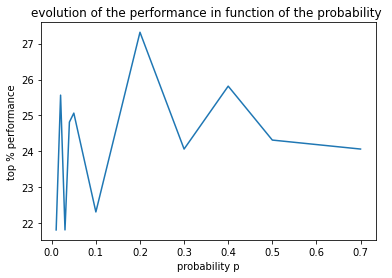

In [24]:

# presente the top % ranking of the gready approche
# the lower the better

plt.xlabel('probability p')
plt.ylabel('top % performance')
plt.title('evolution of the performance in function of the probability ');
plt.plot(probabilities,performance)

This shows that the probability as weight in the graph dont have corrolation with the performance of the gready approche